## 로지스틱 회귀, 피마인디언 당뇨병
___

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
r_seed = 2022

In [4]:
df = pd.read_csv('./datasets/diabetes.csv')

In [6]:
df.shape

(768, 9)

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df_temp = df.loc[:, ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
df_temp.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1


In [16]:
def iszero(x):
    return x == 0

In [17]:
df_temp.apply(iszero).sum(axis=0)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [18]:
# 이상치 -> Na

df_temp = df_temp.replace(0, np.NaN)

df_temp.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1


In [19]:
df_temp.isna().sum(axis=0)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [20]:
df_temp.duplicated().sum()

0

In [21]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df_temp
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [22]:
df.isna().sum(axis=0)

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [29]:
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[c].fillna(df[c].mean(), inplace = True)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [30]:
df.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

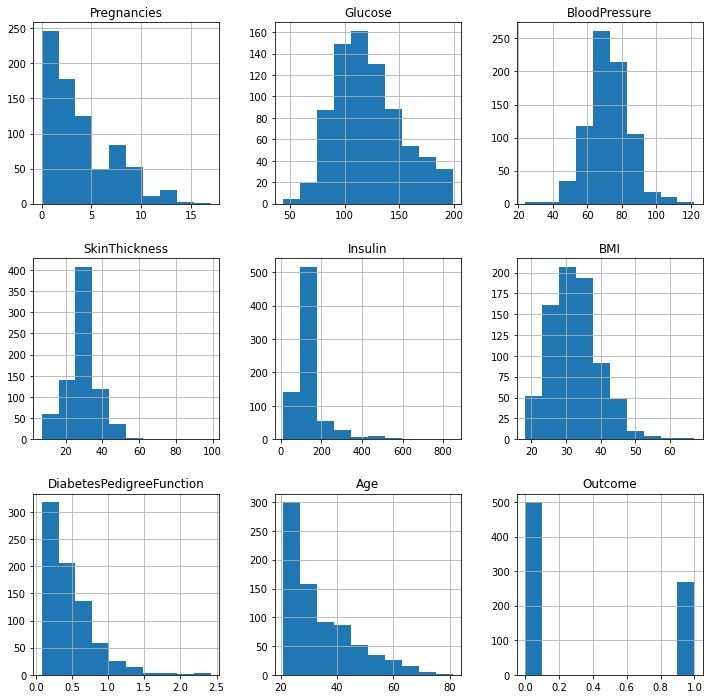

In [32]:
df.hist(figsize=(12, 12))
plt.show()

In [35]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [37]:
# X, y 분리

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [41]:
X.shape, y.shape

((768, 8), (768,))

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = r_seed, stratify=y)

In [45]:
X_train.shape, y_train.shape

((614, 8), (614,))

In [46]:
y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [47]:
y_train.value_counts()

0    400
1    214
Name: Outcome, dtype: int64

In [50]:
## 스케일

sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_train)
sc.transform(X_test)

# sc.fit_transform(X_train)

array([[-1.12433047,  0.46211517,  1.84877716, ...,  1.17709643,
        -0.55578652, -0.59610914],
       [ 0.08044948,  2.06429766,  0.02082183, ..., -0.57393592,
        -0.77285895,  0.25488136],
       [-0.5219405 , -1.00655211, -0.85995494, ..., -0.73181588,
         0.17080312, -0.93650534],
       ...,
       [-1.12433047, -0.47249128, -0.85995494, ...,  0.60298746,
         0.87025871, -0.68120819],
       [-0.82313549, -0.17208207,  0.49441111, ...,  0.53122384,
         0.08337117, -0.68120819],
       [-0.82313549,  0.49549397,  0.1558196 , ...,  0.71780925,
        -0.20907362, -0.76630724]])

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\042\miniconda3\envs\myml\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [58]:
confusion_matrix(y_test, y_pred)

array([[84, 16],
       [21, 33]], dtype=int64)

In [61]:
y_proba = lr.predict_proba(X_test)

In [62]:
np.argmax(y_proba, axis = 1)

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [63]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#확률일 때 많이 씀

In [67]:
fper, tper, threshold = roc_curve(y_test, y_proba[:,1])

In [68]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper)
    plt.plot([0, 1], [0, 1])
    plt.show()

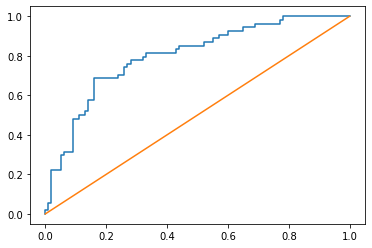

In [69]:
plot_roc_curve(fper, tper)

In [72]:
roc_auc_score(y_test, y_proba[:, 1])

0.7990740740740742